In [197]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Arrow, Rectangle, Path, PathPatch
from matplotlib.transforms import Affine2D
import matplotlib.pyplot as plt
from collections import namedtuple
from PIL import Image

In [198]:
![ ! -f circle.jpg ] && curl -s https://static1.squarespace.com/static/584040ffbe6594762f59f93a/t/5c3f526bf950b76b4a3d070b/1547653864822/ALL+PART+OF+THE+CIRCLE+-+SHLIAN.jpg -o circle.jpg

# PORTALS AND EDGE WRAP

![](circle.jpg)

In [199]:
im = Image.open('circle.jpg')

In [200]:
puzzle = 'AAFFE1BXAXE2ECAF'

N = 4

In [201]:
def find_path(puzzle, N=4, xy=(0, 0)):
    x, y = xy
    path = []
    
    # Stop if we're visiting the same square twice. Portals can be used many times.
    while (x, y) not in path or puzzle[y * N + x] == 'X':
        path.append((x, y))
        
        a = puzzle[y * N + x]
        s = 1  # "speed"
        
        if a == 'A':
            dx, dy = 0, 1
        elif a == 'B':
            dx, dy = 0, 1
            s = 2
        elif a == 'C':
            dx, dy = 0, -1
        elif a == 'D':
            dx, dy = 0, -1
            s = 2
        elif a == 'E':
            dx, dy = -1, 0
        elif a == 'F':
            dx, dy = -1, 0
            s = 2
        elif a == 'G':
            dx, dy = 1, 0
        elif a == 'H':
            dx, dy = 1, 0
            s = 2
        elif a == 'X':
            exit = [i for i, b in enumerate(puzzle) if b == 'X' and i != y * N + x][0]
            x, y = exit % N, exit // N
            s = 1  # Slow down: no speed jumping out of a portal
        
        x, y = (x + dx * s) % N, (y + dy * s) % N
    
    if len(path) > 0 and path[0] == (x, y):
        return path

In [202]:
# Here we go. Brute force!
Sol = namedtuple('Sol', ['path', 'puzzle', 'xy', 'sol'])
sol = Sol([], puzzle, (0, 0), '12')

for _1 in 'ABCDEFGH':
    for _2 in 'ABCDEFGH':
        p = puzzle.replace('1', _1).replace('2', _2)
        
        for x in range(N):
            for y in range(N):
                # Don't begin in a portal
                if p[y * N + x] == 'X':
                    continue
                
                path = find_path(p, N, (x, y))
                
                if path is not None and len(path) > len(sol.path):
                    sol = Sol(path, p, (x, y), f'{_1}{_2}')

In [203]:
sol

Sol(path=[(0, 0), (0, 1), (3, 1), (0, 2), (0, 3), (3, 3), (1, 3), (1, 2), (3, 0), (1, 0), (1, 1), (1, 2), (3, 2), (2, 2), (1, 2), (2, 1), (2, 3), (2, 0)], puzzle='AAFFEABXAXEEECAF', xy=(0, 0), sol='AE')

In [204]:
# The code
print(sol.puzzle[puzzle.index('1')] + sol.puzzle[puzzle.index('2')])

AE


In [205]:
def get_patches(z):
    return {
        '1': [],
        '2': [],
        'X': [], #[Rectangle((1 / 4, 1 / 4), 3 / 4, 3 / 4)],  # Can't transform this?!
        'E': [Arrow(3 / 4, 1 / 2, -1 / 2, 0)],
        'F': [Arrow(3 / 4, 1 / 4, -1 / 2, 0),
              Arrow(3 / 4, 3 / 4, -1 / 2, 0)],
        'G': [Arrow(1 / 4, 1 / 2, 1 / 2, 0)],
        'H': [Arrow(1 / 4, 1 / 4, 1 / 2, 0),
              Arrow(1 / 4, 3 / 4, 1 / 2, 0)],
        'C': [Arrow(1 / 2, 3 / 4, 0, -1 / 2)],
        'D': [Arrow(1 / 4, 3 / 4, 0, -1 / 2),
              Arrow(3 / 4, 3 / 4, 0, -1 / 2)],
        'A': [Arrow(1 / 2, 1 / 4, 0, 1 / 2)],
        'B': [Arrow(1 / 4, 1 / 4, 0, 1 / 2),
              Arrow(3 / 4, 1 / 4, 0, 1 / 2)]
    }[z]

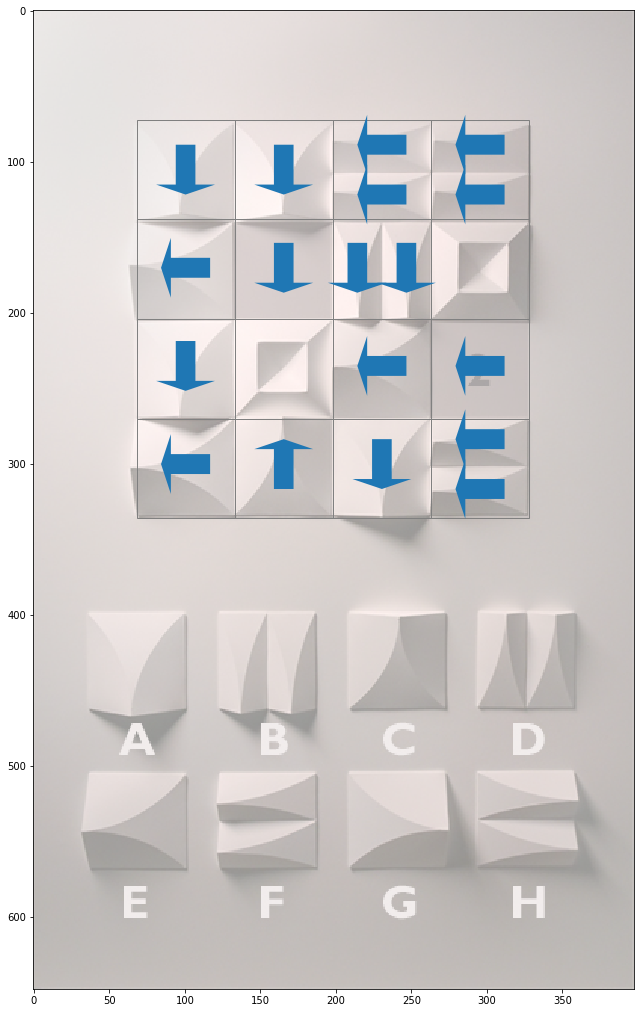

In [206]:
fig, ax = plt.subplots(figsize=(16, 18))

ax.imshow(im, alpha=.5)

x0, y0 = 68, 72
width, height = 65, 66

tx0 = Affine2D().scale(width, height) + Affine2D().translate(x0, y0)

for x in range(N):
    for y in range(N):
        ax.add_patch(Rectangle((x0 + width * x, y0 + height * y), width, height, fc='none', ec='gray'))
        
for i, z in enumerate(sol.puzzle):
    x, y = i % N, i // N
    tx = tx0 + Affine2D().translate(width * x, height * y)
    
    for p in get_patches(z):
        p.get_transform().scale(width, height).translate(x0 + width * x, y0 + width * y)
        ax.add_patch(p)